# Matrix transformations
In R3 a geometric transformation can be difined in the following way:
$$
\left(\begin{array}{cc} 
x'\\ y'\\ 1
\end{array}\right) =
\left(\begin{array}{cc} 
a11 & a12 & a13\\
a21 & a22 & a23\\
a31 & a32 & a33
\end{array}\right)
\left(\begin{array}{cc} 
x \\ y \\ 1
\end{array}\right)
$$
where a11 to a33 define the type of transformations.

Applying a geometric transformation to a given matrix in Numpy requires applying the inverse of the transformation to the coordinates of the matrix, create a new matrix of indices from the coordinates and map the matrix to the new indices.

In the following example we will use a matrix, represented as an image for visual support. Once we calculate the new indices matrix we will map the original matrix to the new indices, wrapping the out-of-bounds indices to obtain a continuous plane using numpy.take with mode='wrap'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

#Some visual settings:
%matplotlib inline

Let's start with scaling transformation using inhomogeneous coordinates. We define square with equal sides and plot it.

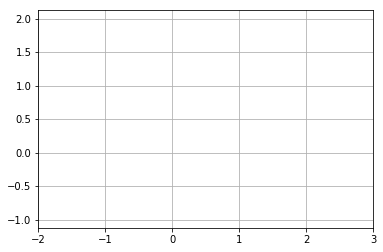

In [2]:
data_x = np.array([0, 1, 1, 0])
data_y = np.array([0, 0, 1, 1])
plt.axis((-2,3,-2,3))
plt.grid(True)
plt.axes().set_aspect('equal', 'datalim')
#plt.fill_between(data_x, data_y)

Use scaling matrix and transform the coordinates and plot.

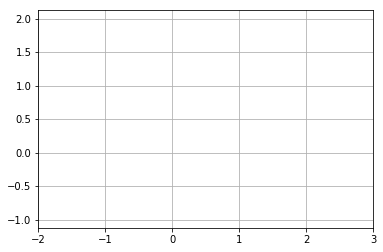

In [3]:
scale_trns = np.array([[1.5, 0], [0, 1.5]])
scaled_data = np.dot(scale_trns, np.vstack((data_x, data_y)))
scaled_data_x, scaled_data_y = scaled_data[0,:], scaled_data[1,:]
plt.axis((-2,3,-2,3))
plt.grid(True)
plt.axes().set_aspect('equal', 'datalim')
#plt.fill_betweenx(scaled_data_x, scaled_data_y)

We will create necessary tool to draw ploygon given 4 points 'plot_ploy' is the utility to draw the polygon given 4 points

In [4]:
#Create a rectangle for this example:
verts = [
    (0., 0.), # left, bottom
    (0., 1.), # left, top
    (1., 1.), # right, top
    (1., 0.), # right, bottom
    ]

In [5]:
# Plotting Utility
codes = [Path.MOVETO,
         Path.LINETO,
         Path.LINETO,
         Path.LINETO,
         ]
path = Path(verts, codes)
def plot_poly(path):
    """
    Utility to plot the polygon
    """
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111,aspect='equal')
    patch = patches.PathPatch(path, facecolor='blue')
    ax.add_patch(patch)
    ax.set_xlim(-5,5)
    ax.set_ylim(-5,5)
    ax.grid(True, which='both')
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    plt.show()
    return

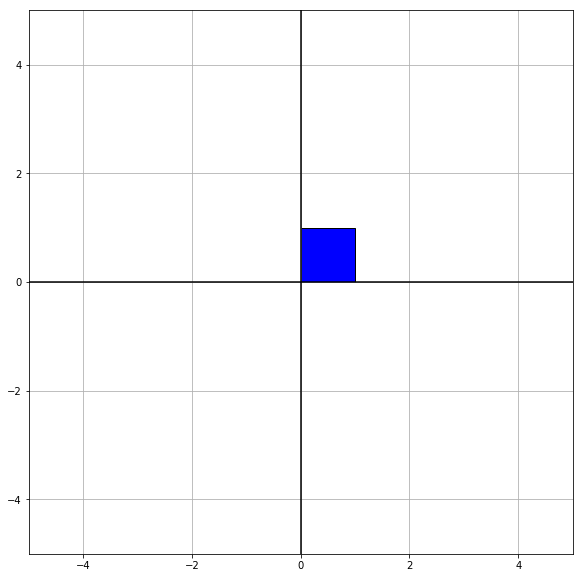

In [6]:
plot_poly(path)

The geometric transformation function be written as follows:

In [7]:
def geometric_transformation(points, a):
    points = np.array(points).T  #Transpose
    points = np.insert(points, 2, 1, axis=0)  #Convert to homogeneous coordinates
    new_points = np.dot(a,points)  #Transformation
    new_points = (new_points[:-1]/new_points[-1])  #Convert back to inhomogeneous coordinates
    return new_points.T  #Transpose back

Let's see some transformations we can do.
Scaling the plane in the x-axis by a factor of 1.5:
$$
\left(\begin{array}{cc} 
x'\\ y'\\ 1
\end{array}\right) =
\left(\begin{array}{cc} 
1.5 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 1
\end{array}\right)
\left(\begin{array}{cc} 
x \\ y \\ 1
\end{array}\right)
$$

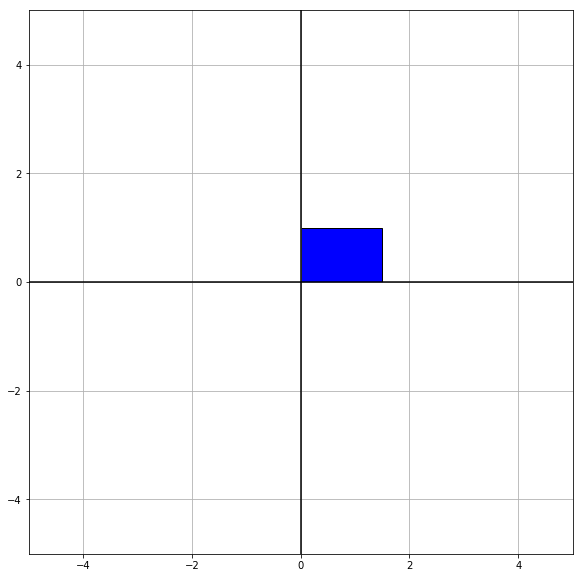

In [8]:
a = np.array([[1.5, 0, 0],
              [0, 1, 0],
              [0, 0, 1]])
dst = geometric_transformation(verts, a)
path = Path(dst,codes)
plot_poly(path)

Scaling in the x-y plane by a factor of 1.5:
$$
\left(\begin{array}{cc} 
x'\\ y'\\ 1
\end{array}\right) =
\left(\begin{array}{cc} 
1.5 & 0 & 0\\
0 & 1.5 & 0\\
0 & 0 & 1
\end{array}\right)
\left(\begin{array}{cc} 
x \\ y \\ 1
\end{array}\right)
$$

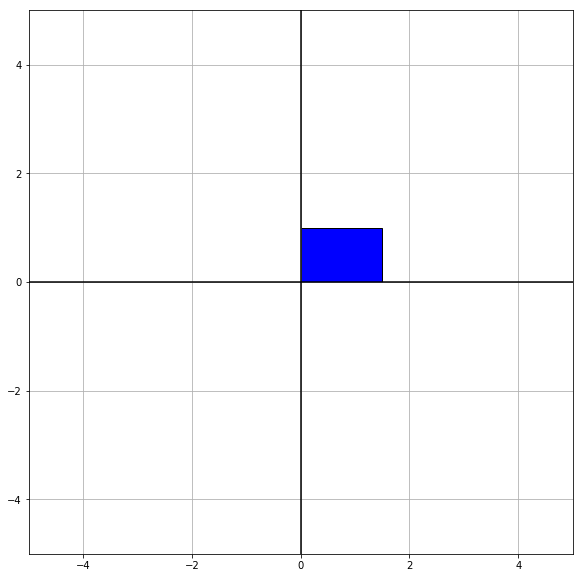

In [9]:
#a = ?
dst = geometric_transformation(verts, a)
path = Path(dst,codes)
plot_poly(path)

Translation in x-axis by 1:
$$
\left(\begin{array}{cc} 
x'\\ y'\\ 1
\end{array}\right) =
\left(\begin{array}{cc} 
1 & 0 & 1\\
0 & 1 & 0\\
0 & 0 & 1
\end{array}\right)
\left(\begin{array}{cc} 
x \\ y \\ 1
\end{array}\right)
$$

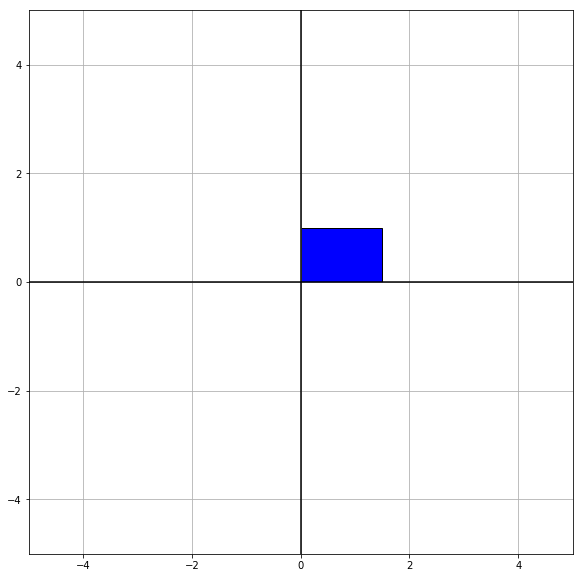

In [10]:
#a = ?
dst = geometric_transformation(verts, a)
path = Path(dst,codes)
plot_poly(path)

Translation in x-y plane by 1:
$$
\left(\begin{array}{cc} 
x'\\ y'\\ 1
\end{array}\right) =
\left(\begin{array}{cc} 
1 & 0 & 1\\
0 & 1 & 1\\
0 & 0 & 1
\end{array}\right)
\left(\begin{array}{cc} 
x \\ y \\ 1
\end{array}\right)
$$

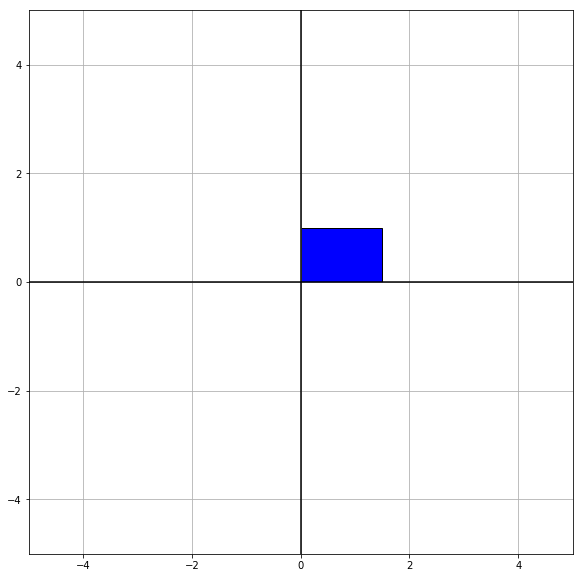

In [11]:
#a = ?
dst = geometric_transformation(verts, a)
path = Path(dst,codes)
plot_poly(path)

Rotation by angle:
$$
\left(\begin{array}{cc} 
x'\\ y'\\ 1
\end{array}\right) =
\left(\begin{array}{cc} 
cos(pi/4) & -sin(pi/4) & 0\\
sin(pi/4) & cos(pi/4) & 0\\
0 & 0 & 1
\end{array}\right)
\left(\begin{array}{cc} 
x \\ y \\ 1
\end{array}\right)
$$

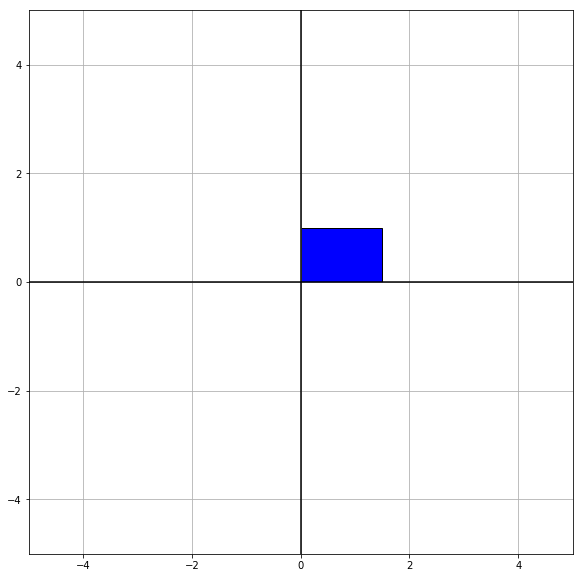

In [12]:
#a = ? use 'np.cos' 'np.pi'
dst = geometric_transformation(verts, a)
path = Path(dst,codes)
plot_poly(path)

Similarity transformation:
$$
\left(\begin{array}{cc} 
x'\\ y'\\ 1
\end{array}\right) =
\left(\begin{array}{cc} 
s*cos(pi/4) & -s*sin(pi/4) & 0\\
s*sin(pi/4) & s*cos(pi/4) & 0\\
0 & 0 & 1
\end{array}\right)
\left(\begin{array}{cc} 
x \\ y \\ 1
\end{array}\right)
$$

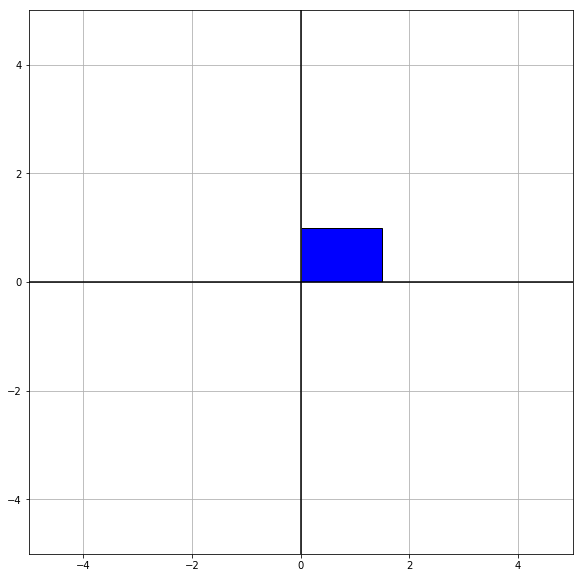

In [14]:
#a = ? use 'np.cos' 'np.pi'
#alpha = np.pi/8
#a = np.array([[1.5*np.cos(2*alpha), -1.5*np.sin(2*alpha),0],
#              [1.5*np.sin(2*alpha), 1.5*np.cos(2*alpha),0],
#              [0, 0, 1]])
dst = geometric_transformation(verts, a)
path = Path(dst,codes)
plot_poly(path)

Affine transformation:
$$
\left(\begin{array}{cc} 
x'\\ y'\\ 1
\end{array}\right) =
\left(\begin{array}{cc} 
a11 & a12 & tx\\
a21 & a22 & ty\\
0 & 0 & 1
\end{array}\right)
\left(\begin{array}{cc} 
x \\ y \\ 1
\end{array}\right)
$$

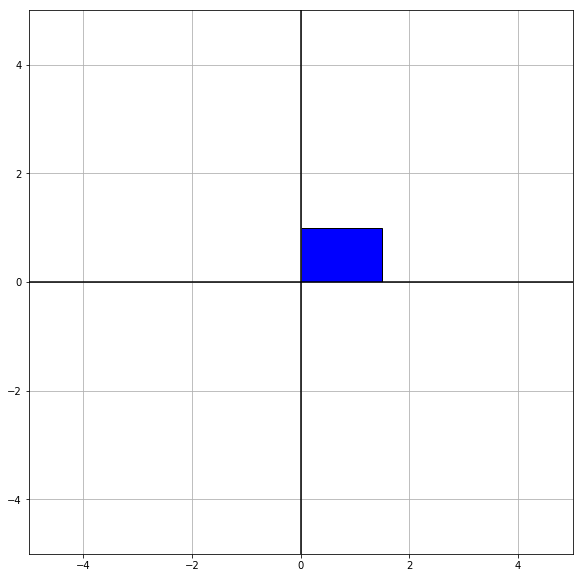

In [15]:
#a = ?
dst = geometric_transformation(verts, a)
path = Path(dst,codes)
plot_poly(path)

Projective transformation:
$$
\left(\begin{array}{cc} 
x'\\ y'\\ 1
\end{array}\right) =
\left(\begin{array}{cc} 
a11 & a12 & tx\\
a21 & a22 & ty\\
v1 & v2 & 1
\end{array}\right)
\left(\begin{array}{cc} 
x \\ y \\ 1
\end{array}\right)
$$

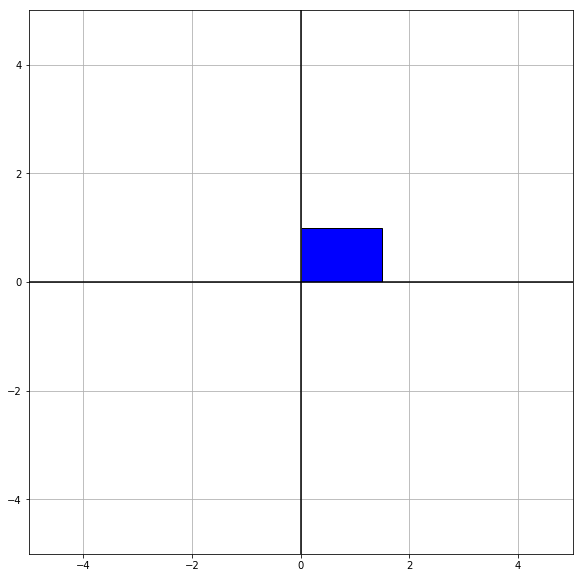

In [16]:
#a = np.array([[4, 2, 0], [0, 4, 0], [0, 1, 1]])
dst = geometric_transformation(verts, a)
path = Path(dst,codes)
plot_poly(path)

In [17]:
print('The end!')

The end!
